# __Working with Text Data in Pandas__

## __Agenda__

- Text Data in Pandas
- Iteration
  * Iterating over Rows
  * Applying a Function to Each Element
  * Vectorized Operations
  * Iterating over Series
- Sorting
  * Sorting DataFrame by Column
  * Sorting DataFrame by Multiple Columns
  * Sorting DataFrame by Index
  * Sorting a Series
- Plotting with Pandas

### __1. Text Data in Pandas__

Working with text data in Pandas involves various operations to manipulate and analyze textual information. Here are some common text data operations using Pandas:

In [1]:
# Assuming 'df' is DataFrame with a 'Column' containing text data
import pandas as pd

df = pd.DataFrame({'Column': ['Hello', 'World', 'Python', 'Data Science']})

# Calculates the length of each string
df['Length'] = df['Column'].str.len()
print("Length of each string:")
print(df[['Column', 'Length']])


Length of each string:
         Column  Length
0         Hello       5
1         World       5
2        Python       6
3  Data Science      12


In [2]:
# Assuming 'df' is DataFrame with a 'Column' containing text data
df = pd.DataFrame({'Column': ['Hello', 'World', 'Python', 'Data Science']})

# Converts text to lowercase
df['Lowercase'] = df['Column'].str.lower()
print("\nText in lowercase:")
print(df[['Column', 'Lowercase']])



Text in lowercase:
         Column     Lowercase
0         Hello         hello
1         World         world
2        Python        python
3  Data Science  data science


In [3]:
# Assuming 'df' is DataFrame with a 'Column' containing text data
df = pd.DataFrame({'Column': ['Hello', 'World', 'Python', 'Data Science']})

# Checks if each string contains the specified substring
substring = 'Data'
df['ContainsSubstring'] = df['Column'].str.contains(substring)
print("\nContains substring 'Data':")
print(df[['Column', 'ContainsSubstring']])



Contains substring 'Data':
         Column  ContainsSubstring
0         Hello              False
1         World              False
2        Python              False
3  Data Science               True


## __2. Iteration__

Iteration in Pandas typically involves traversing through the rows or elements of a DataFrame or Series.
- However, it is important to note that direct iteration over DataFrame rows using Python's for loop is generally discouraged due to performance reasons.
- Instead, Pandas provides efficient methods for iteration and applying functions to DataFrame elements.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_04_Working_with_Pandas/4_Working_with_Text_Data_in_Pandas/Iteration.png)

### __2.1 Iterating over Rows__

In [4]:
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'Column1' and 'Column2'
df = pd.DataFrame({'Column1': [1, 2, 3], 'Column2': ['A', 'B', 'C']})

for index, row in df.iterrows():
    print(f"Index: {index}, Data: {row['Column1']}, {row['Column2']}")


Index: 0, Data: 1, A
Index: 1, Data: 2, B
Index: 2, Data: 3, C


### __2.2 Applying a Function to Each Element__

In [5]:
# recommend to use this method instead of iterrows for better performance
# Assuming 'df' is your DataFrame with 'ExistingColumn'
df = pd.DataFrame({'col1': [10, 20, 30]})

df['NewColumn'] = df['ExistingColumn'].apply(lambda x: x * 2)
print(df)


   ExistingColumn  NewColumn
0              10         20
1              20         40
2              30         60


In [9]:
# use apply() with multiple cols
# double the values of 'col1' and convert 'col2' to double
df = pd.DataFrame({'col1': [10, 20, 30], 'col2': ['1', '2', '3']})

df['col1'] = df['col1'].apply(lambda x: x * 2)
df['col2'] = df['col2'].apply(lambda x: x * 2)
print(df)

# i need the result in a single step
# return a Series with two elements (one per column) — do not multiply the list itself
df[['col1', 'col2']] = df.apply(lambda row: row * 2, axis=1)

   col1 col2
0    20   11
1    40   22
2    60   33


### __2.3 Vectorized Operations__

In [6]:
# Assuming 'df' is your DataFrame with 'ColumnA' and 'ColumnB'
df = pd.DataFrame({'ColumnA': [1, 2, 3], 'ColumnB': [4, 5, 6]})

df['ResultColumn'] = df['ColumnA'] + df['ColumnB']
print(df)

   ColumnA  ColumnB  ResultColumn
0        1        4             5
1        2        5             7
2        3        6             9


### __2.4 Iterating over Series__

In [ ]:
# Assuming 'series' is your Pandas Series
series = pd.Series([10, 20, 30], name='Values')

for index, value in series.items():
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: 10
Index: 1, Value: 20
Index: 2, Value: 30


## __3. Sorting__
Sorting in Pandas involves arranging the elements of a DataFrame or Series based on specific criteria, such as column values or indices.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Updated_Images/Lesson_4/4_04/Sorting.png)

### __3.1 Sorting DataFrame by Column__

In [10]:
# Create a sample DataFrame
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                   'Age': [25, 22, 30],
                   'Salary': [50000, 60000, 75000]})

# Sort DataFrame by the 'Age' column in ascending order
df_sorted = df.sort_values(by='Age', ascending=True)
print("Sorted DataFrame by Age:\n", df_sorted)

Sorted DataFrame by Age:
       Name  Age  Salary
1      Bob   22   60000
0    Alice   25   50000
2  Charlie   30   75000


### __3.2 Sorting DataFrame by Multiple Columns__

In [ ]:
# Sort DataFrame by 'Age' in ascending order, then by 'Salary' in descending order
df_sorted_multi = df.sort_values(by=['Age', 'Salary'], ascending=[True, False])
print("\nSorted DataFrame by Age and Salary:\n", df_sorted_multi)



Sorted DataFrame by Age and Salary:
       Name  Age  Salary
1      Bob   22   60000
0    Alice   25   50000
2  Charlie   30   75000


In [24]:
df = pd.DataFrame({
    "Week": [1, 1, 2, 2, 1],
    "Temperature": [70, 60, 65, 80, 60],
    "Precipitation": [0.1, 0.2, 0.1, 0.3, 0.05]
})

# Add a category column
def classify_temp(t):
    if t < 65:
        return "Low"
    elif t <= 70:
        return "Medium"
    else:
        return "High"
df['Temp_Category'] = df['Temperature'].apply(classify_temp)
# df.sort_values(by=['Week', 'Temperature'], ascending=[True, False])

# Make the Temp_Category as categorical.
df["Temp_Category"] = pd.Categorical(
    df["Temp_Category"],
    categories=["Low", "Medium", "High"],
    ordered=True
)

# df.sort_values(["Temp_Category", "Temperature"])
df.sort_values(by="Temp_Category",inplace=True ,ascending=False)


print(df)

df.info()



   Week  Temperature  Precipitation Temp_Category
3     2           80           0.30          High
0     1           70           0.10        Medium
2     2           65           0.10        Medium
1     1           60           0.20           Low
4     1           60           0.05           Low
<class 'pandas.DataFrame'>
Index: 5 entries, 3 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Week           5 non-null      int64   
 1   Temperature    5 non-null      int64   
 2   Precipitation  5 non-null      float64 
 3   Temp_Category  5 non-null      category
dtypes: category(1), float64(1), int64(2)
memory usage: 297.0 bytes


### __3.3 Sorting DataFrame by Index__

In [26]:
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                   'Age': [25, 22, 30],
                   'Salary': [50000, 60000, 75000]})

# Sort DataFrame by index in descending order
df_sorted_index = df.sort_index(ascending=False)
print("\nSorted DataFrame by Index:\n", df_sorted_index)



Sorted DataFrame by Index:
       Name  Age  Salary
2  Charlie   30   75000
1      Bob   22   60000
0    Alice   25   50000


### __3.4 Sorting a Series__

In [ ]:
# Create a sample Series
series = pd.Series([25, 22, 30], index=['Alice', 'Bob', 'Charlie'], name='Age')

# Sort Series in descending order
series_sorted = series.sort_values(ascending=False)
print("\nSorted Series by Age:\n", series_sorted)



Sorted Series by Age:
 Charlie    30
Alice      25
Bob        22
Name: Age, dtype: int64


## __4. Plotting with Pandas__
Plotting data is required to visualize the data in Python. Python uses the plot method in pandas to create plots; there are many types of plots available in pandas.

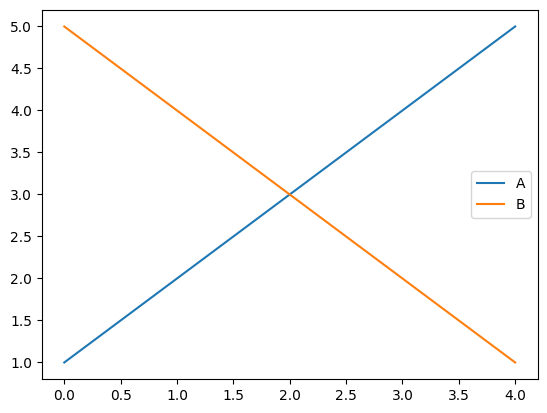

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

# Plot a line chart
df.plot()
plt.show()

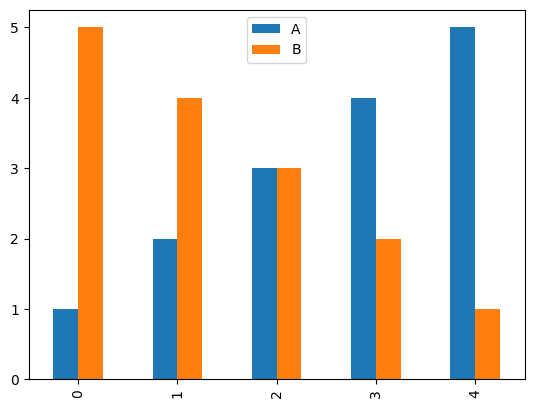

In [ ]:
# Plot a bar chart
df.plot(kind='bar')
plt.show()


# __Assisted Practice__

## __Problem Statement:__
Create a detailed report on the monthly weather data by performing text manipulation, data sorting, and visualization to analyze temperature and precipitation trends.

__Data:__
The dataset contains daily observations of temperature and precipitation over a month.

## __Steps to Perform:__

1. Textual manipulation
- Convert 'Day' to a string format with appropriate suffixes (1st, 2nd, 3rd, and so on)
- Classify 'Temperature' into categories (Low, Medium, High) based on predefined thresholds
- Determine if 'Precipitation' falls under 'Light', 'Moderate', or 'Heavy' rainfall

2. Iteration and data aggregation
- Iterate over the DataFrame to calculate weekly averages of temperature and precipitation
- Summarize findings in a new DataFrame

3. Sorting
- Sort the DataFrame by 'Temperature' and 'Precipitation' in ascending and descending order
- Sort the DataFrame by the day of the month

4. Plotting
- Create a line plot for temperature trends
- Create a bar plot to compare precipitation levels across the month

In [29]:
import pandas as pd
df = pd.read_csv('Weather_data.csv')  
df.head(3)

,Day,Temperature,Precipitation
0,1,23.232203,2.645556
1,2,25.727840,7.742337
2,3,24.041451,4.561503


In [33]:
# Convert 'Day' to a string format with appropriate suffixes (1st, 2nd, 3rd, and so on)
# Classify 'Temperature' into categories (Low, Medium, High) based on predefined thresholds
# Determine if 'Precipitation' falls under 'Light', 'Moderate', or 'Heavy' rainfall

# --- IGNORE ---
def ordinal(day):
    if 11 <= day <= 13:
        return f"{day}th"
    last_digit = day % 10
    if last_digit == 1:
        return f"{day}st"
    elif last_digit == 2:
        return f"{day}nd"
    elif last_digit == 3:
        return f"{day}rd"
    else:
        return f"{day}th"
    
# def ordinalV2(n):
#     return (
#         f"{n}th" if 11 <= n % 100 <= 13
#         else f"{n}{['th', 'st', 'nd', 'rd', 'th'][min(n % 10, 4)]}"
#     )    

df['Day_str'] = df['Day'].astype(int).apply(ordinal)

def classify_temp(t):
    if t < 16:
        return "Low"
    elif t <= 22:
        return "Medium"
    else:
        return "High"

df['Temp_Category'] = df['Temperature'].apply(classify_temp)
df['Temp_Category'] = pd.Categorical(
    df['Temp_Category'],    
    categories=["Low", "Medium", "High"],
    ordered=True
)

def classify_precip(p):
    if p < 2.5:
        return "Light"
    elif p <= 7.6:
        return "Moderate"
    else:
        return "Heavy"
    
df['Precip_Category'] = df['Precipitation'].apply(classify_precip)
df.head()





    



,Day,Temperature,Precipitation,Day_str,Temp_Category,Precip_Category
0,1,23.232203,2.645556,1st,High,Moderate
1,2,25.727840,7.742337,2nd,High,Heavy
2,3,24.041451,4.561503,3rd,High,Moderate
3,4,23.173248,5.684339,4th,High,Moderate
4,5,21.354822,0.187898,5th,Medium,Light


In [ ]:
# Iterate over the DataFrame to calculate weekly averages of temperature and precipitation
# Summarize findings in a new DataFrame

# Create 'Week' column based on Day (7 days per week)
df['Week'] = (df['Day'] - 1) // 7 + 1

weekly_averages = df.groupby('Week').agg({
    'Temperature': 'mean',
    'Precipitation': 'mean'
}).reset_index()

weekly_averages.head()




,Week,Temperature,Precipitation
0,1,23.397398,4.731278
1,2,25.828154,5.424141
2,3,22.795266,4.180070
3,4,23.330110,4.008009
4,5,22.023827,3.553682


In [ ]:
# Sort the DataFrame by 'Temperature' and 'Precipitation' in ascending and descending order
# Sort the DataFrame by the day of the month




